In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Ashish\Desktop\Velocity\DATA SCI BATCH\Main Notes\Machine Learning\Logestic\data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
#seperating independent and dependent variables
x = df.drop(['Survived'], axis=1)
y = df['Survived']
x.shape, y.shape

((891, 24), (891,))

In [7]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25, random_state = 56,stratify=y)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [10]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.497361,0.018494,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.484795,0.061045,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.367921,0.027058,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.321438,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.308872,0.014932,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [12]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [14]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7636363636363636


In [15]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.7100591715976331


# Making predictions using predict_proba function

In [26]:
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.52403253, 0.47596747],
       [0.94518176, 0.05481824],
       [0.73269818, 0.26730182],
       ...,
       [0.91482501, 0.08517499],
       [0.45721033, 0.54278967],
       [0.75708522, 0.24291478]])

In [ ]:
0.47596747 -1

0.47596747 >=0.5 then its 1

In [ ]:
0.52403253- 0

0.52403253 >=0.5 then its 0

In [17]:
0.47596747 >=0.5

False

In [ ]:
0.47596747 >=0.5

In [18]:
0.05481824 >=0.5

False

In [19]:
0.26730182 >=0.5

False

In [27]:
train_predict[:,1]

array([0.47596747, 0.05481824, 0.26730182, 0.87128431, 0.10259815,
       0.65009234, 0.14335424, 0.51446493, 0.9044771 , 0.56132467,
       0.12755127, 0.10265264, 0.88286283, 0.10664144, 0.75903643,
       0.79222279, 0.14133365, 0.97155637, 0.1448646 , 0.11468992,
       0.69234582, 0.82729391, 0.59377871, 0.06303825, 0.71542117,
       0.139628  , 0.06090188, 0.11985111, 0.93054031, 0.02962065,
       0.86753445, 0.11534156, 0.34650907, 0.36914721, 0.82004861,
       0.14071962, 0.1038696 , 0.74077534, 0.12466872, 0.09186435,
       0.11987398, 0.09956132, 0.9476485 , 0.29736791, 0.44256702,
       0.08156434, 0.93406795, 0.95667612, 0.11527197, 0.96120445,
       0.08520822, 0.12455942, 0.64367855, 0.12800161, 0.1163132 ,
       0.35001333, 0.1110578 , 0.95076556, 0.11527197, 0.1038696 ,
       0.91512559, 0.74699741, 0.8280298 , 0.4555254 , 0.34684681,
       0.63365807, 0.07461202, 0.38003274, 0.1038696 , 0.8968288 ,
       0.14489365, 0.09253461, 0.36915224, 0.23146906, 0.11186

In [28]:
train_preds = train_predict[:,1]
train_preds

array([0.47596747, 0.05481824, 0.26730182, 0.87128431, 0.10259815,
       0.65009234, 0.14335424, 0.51446493, 0.9044771 , 0.56132467,
       0.12755127, 0.10265264, 0.88286283, 0.10664144, 0.75903643,
       0.79222279, 0.14133365, 0.97155637, 0.1448646 , 0.11468992,
       0.69234582, 0.82729391, 0.59377871, 0.06303825, 0.71542117,
       0.139628  , 0.06090188, 0.11985111, 0.93054031, 0.02962065,
       0.86753445, 0.11534156, 0.34650907, 0.36914721, 0.82004861,
       0.14071962, 0.1038696 , 0.74077534, 0.12466872, 0.09186435,
       0.11987398, 0.09956132, 0.9476485 , 0.29736791, 0.44256702,
       0.08156434, 0.93406795, 0.95667612, 0.11527197, 0.96120445,
       0.08520822, 0.12455942, 0.64367855, 0.12800161, 0.1163132 ,
       0.35001333, 0.1110578 , 0.95076556, 0.11527197, 0.1038696 ,
       0.91512559, 0.74699741, 0.8280298 , 0.4555254 , 0.34684681,
       0.63365807, 0.07461202, 0.38003274, 0.1038696 , 0.8968288 ,
       0.14489365, 0.09253461, 0.36915224, 0.23146906, 0.11186

In [23]:
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.5):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
       
train_preds    

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1.

In [29]:
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.2):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
       
train_preds 

array([1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1.

In [31]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7145135566188199


In [32]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.3):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )   

Training f1_score 0.7416520210896309


In [34]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.4):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k ) 

Training f1_score 0.7631578947368421


In [35]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.6):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k ) 

Training f1_score 0.7312775330396477


In [36]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.7):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k ) 

Training f1_score 0.6716417910447762


In [37]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.8):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.5674931129476584


In [38]:
train_predict = logreg.predict_proba(train_x)
train_preds = train_predict[:,1]
for i in range(0, len(train_preds)):
    if(train_preds[i]>=0.9):
       train_preds[i] = 1
    else:
       train_preds[i] = 0
    
 # Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.3419354838709678


In [39]:
# printing the coefficients
logreg.coef_

array([[-4.36796586e-02,  8.52802446e-04,  1.21707255e+00,
         9.70856704e-02, -1.04385173e+00,  1.44982933e+00,
        -1.17952284e+00,  7.70175568e-01,  8.66941510e-01,
         2.41463061e-01, -6.02315689e-01, -4.22501247e-01,
        -2.24006741e-01, -3.59449973e-01,  1.90369253e-01,
         4.32390622e-01, -1.49828620e-01,  1.25366729e-01,
        -2.08651820e-01,  6.30068990e-03, -1.25640366e-01,
         5.11309136e-02,  3.87393523e-01, -1.68217948e-01]])

Text(0.5, 1.0, 'Coefficient plot')

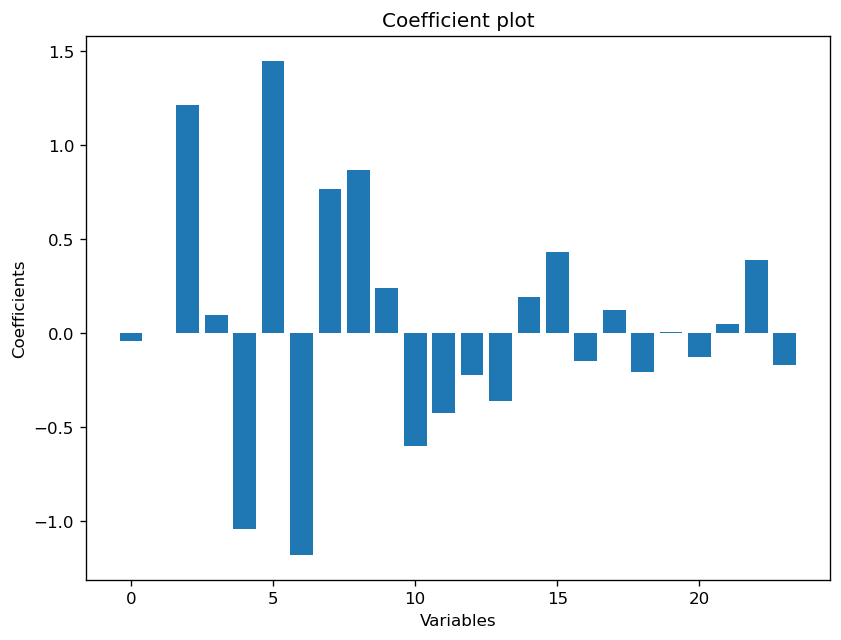

In [40]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [41]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.043680
1,Fare,0.000853
2,Pclass_1,1.217073
3,Pclass_2,0.097086
4,Pclass_3,1.043852
